<a href="https://colab.research.google.com/github/minimelonling/2022_spring_machine_learning/blob/main/hw1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check concurrent folder location
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/intro_to_ml_2022/hw1')

# Start building simple model with Pytorch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Data Loader


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),])##

# /content/drive/MyDrive/Colab Notebooks/data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz
#MNIST 手寫數字辨識集
trainset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data/MNIST', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data/MNIST', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

## Visualize Images

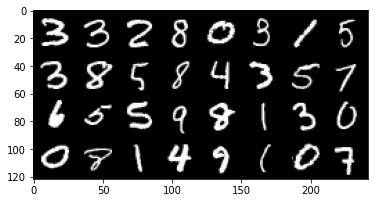

    3     3     2     8     0     3     1     5     3     8     5     8     4     3     5     7     6     5     5     9     8     1     3     0     0     8     1     4     9     1     0     7


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #（channels,imagesize,imagesize）=>（imagesize,imagesize,channels）
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

## Build Example Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# calculating hidden layer neurons
# X(neurons): 2, 4, 8, 16, 64, 128, 1024
# N(layers): 1, 2, 4, 8, 16

X = [2, 4, 8, 16, 64, 128, 1024]
N = [1, 2, 4, 8, 16]

hidden_neuron_num = []
for i in range(0, len(N)):
  hidden_neuron_num.append(np.zeros((len(X), N[i])))
  for j in range(0, len(X)):
    x_3 = 3 * X[j]
    x_1 = X[j]
    for k in range(0, N[i]):
      if N[i] == 1:
        hidden_neuron_num[i][j][k] = X[j]
      else:
        hidden_neuron_num[i][j][k] = (x_3 * k + x_1 * (N[i] - 1 - k)) / (N[i] - 1)
  hidden_neuron_num[i] = np.round_(hidden_neuron_num[i]).astype(int)

print(hidden_neuron_num)


[array([[   2],
       [   4],
       [   8],
       [  16],
       [  64],
       [ 128],
       [1024]]), array([[   2,    6],
       [   4,   12],
       [   8,   24],
       [  16,   48],
       [  64,  192],
       [ 128,  384],
       [1024, 3072]]), array([[   2,    3,    5,    6],
       [   4,    7,    9,   12],
       [   8,   13,   19,   24],
       [  16,   27,   37,   48],
       [  64,  107,  149,  192],
       [ 128,  213,  299,  384],
       [1024, 1707, 2389, 3072]]), array([[   2,    3,    3,    4,    4,    5,    5,    6],
       [   4,    5,    6,    7,    9,   10,   11,   12],
       [   8,   10,   13,   15,   17,   19,   22,   24],
       [  16,   21,   25,   30,   34,   39,   43,   48],
       [  64,   82,  101,  119,  137,  155,  174,  192],
       [ 128,  165,  201,  238,  274,  311,  347,  384],
       [1024, 1317, 1609, 1902, 2194, 2487, 2779, 3072]]), array([[   2,    2,    3,    3,    3,    3,    4,    4,    4,    4,    5,
           5,    5,    5,    6,    

In [ ]:
## This is an simple example of model building by init parameters and adding layer.

class Net_S(nn.Module):
    def __init__(self, n, x, ni, xi, hnn):
        super(Net_S, self).__init__()
        torch.manual_seed(277)
        np.random.seed(277)
        # Initialize object variables
        self.layer = n
        self.neurons = x

        # build sequential model

        # self.hid = torch.nn.Sequential()
        # self.hid.add_module('Lin'+str(1), torch.nn.Linear(28*28, 128)) # appends a Linear layer to hidden 
        # self.hid.add_module("Lin2", torch.nn.Linear(128, 64)) 
        # self.hid.add_module("Lin3", torch.nn.Linear(64 , 10))

        self.hid = self.build_seq_model(torch.nn.Sequential(), ni, xi, hnn)

        # call class function
        self._print_layers()

    def build_seq_model(self, seq, ni, xi, hnn):
      length = len(hnn[ni][xi])
      Lin = 1
      seq.add_module("Lin%d" % (Lin), torch.nn.Linear(28*28, hnn[ni][xi][0]))
      Lin += 1
      if length > 1:
        for i in range(0, length - 1):
          seq.add_module("Lin%d" % (Lin), torch.nn.Linear(hnn[ni][xi][i], hnn[ni][xi][i + 1]))
          Lin += 1
      seq.add_module("Lin%d" % (Lin), torch.nn.Linear(hnn[ni][xi][length - 1], 10))
      Lin += 1
      return seq

    def _print_layers(self):
        print("number of layer: {}  number of neurons: {}".format(self.layer, self.neurons))

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.hid(x)

        return x


In [ ]:
# building neuron networks

neural_networks = []
for i in range(0, len(N)):
  nn_list = []
  for j in range(0, len(X)):
    nn_list.append(Net_S(N[i], X[j], i, j, hidden_neuron_num))
  neural_networks.append(nn_list)

print(neural_networks[0][0])

number of layer: 1  number of neurons: 2
number of layer: 1  number of neurons: 4
number of layer: 1  number of neurons: 8
number of layer: 1  number of neurons: 16
number of layer: 1  number of neurons: 64
number of layer: 1  number of neurons: 128
number of layer: 1  number of neurons: 1024
number of layer: 2  number of neurons: 2
number of layer: 2  number of neurons: 4
number of layer: 2  number of neurons: 8
number of layer: 2  number of neurons: 16
number of layer: 2  number of neurons: 64
number of layer: 2  number of neurons: 128
number of layer: 2  number of neurons: 1024
number of layer: 4  number of neurons: 2
number of layer: 4  number of neurons: 4
number of layer: 4  number of neurons: 8
number of layer: 4  number of neurons: 16
number of layer: 4  number of neurons: 64
number of layer: 4  number of neurons: 128
number of layer: 4  number of neurons: 1024
number of layer: 8  number of neurons: 2
number of layer: 8  number of neurons: 4
number of layer: 8  number of neuron

## Hyper parameters settings

In [ ]:
##############################################
# Remember change net to your 'class Net name'!
##############################################

import torch.optim as optim
epochs = [2, 4, 8, 16]

# Train, test and calculating accuracy

In [ ]:
# merging training and testing

class model():
  def __init__(self, ep, net, trainl, testl):
    self.epoch = ep
    self.criterion = nn.CrossEntropyLoss()
    self.optimizer = optim.Adam(net.parameters(), lr = 0.001)
    self.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    self.net = net.to(self.device)
    self.trainloader = trainl
    self.testloader = testl

# Training model

  def train(self, x, n_row):

    self.net.train()
    for epoch in tqdm(range(self.epoch)):# loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(self.trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            # print(inputs.shape)
            # zero the parameter gradients
            self.optimizer.zero_grad()

            # forward + backward + optimize
            outputs = self.net(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches 
                print('[%d, %5d] loss: %.6f' %
                      (self.epoch + 1, i + 1, running_loss / 999))
                n_row[x + 1] = str(running_loss / 999)
                running_loss = 0.0

    print('Finished Training')

# testing model

  def test(self):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data[0].to(self.device), data[1].to(self.device)
            outputs = self.net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('network info: n = %d, x = %d, epoch = %d\n' % (self.net.layer, self.net.neurons, self.epoch))
    print('Accuracy of the network on the 10000 test images: %f %%\n\n\n' % (
        100 * correct / total))

# calculating accuracy

  def calculate_acc(self, x, n_row):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data[0].to(self.device), data[1].to(self.device)
            outputs = self.net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

    n_row[x + 11] = str(100 * correct / total) + '%'

# train, test, and output accuracy

import csv
len_X = len(X)
len_N = len(N)

with open('/content/drive/My Drive/Colab Notebooks/output2.csv', 'w', newline = '') as csvfile:
  writer = csv.writer(csvfile)
  title = ['Loss', '', '', '', '', '', '', '', '', '', 'Accuracy', '', '', '', '', '', '', '']
  epoch_title = [['epoch = 2', '', '', '', '', '', '', '', '', '', 'epoch = 2', '', '', '', '', '', '', ''],
          ['epoch = 4', '', '', '', '', '', '', '', '', '', 'epoch = 4', '', '', '', '', '', '', ''],
          ['epoch = 8', '', '', '', '', '', '', '', '', '', 'epoch = 8', '', '', '', '', '', '', ''],
          ['epoch = 16', '', '', '', '', '', '', '', '', '', 'epoch = 16', '', '', '', '', '', '', '']]
  writer.writerow(title)
  for e in range(2, 3):
  # for e in range(0, len(epochs)):
    writer.writerow(epoch_title[e])
    writer.writerow(['', '2', '4', '8', '16', '64', '128', '1024', '', '', '', '2', '4', '8', '16', '64', '128', '1024'])
    for n in range(0, len_N):
      n_row = [str(N[n]), '', '', '', '', '', '', '', '', '', str(N[n]), '', '', '', '', '', '', '']
      for x in range(0, len_X):
        print("n = %d, x = %d, e = %d\n" % (N[n], X[x], epochs[e]))
        m = model(epochs[e], neural_networks[n][x], trainloader, testloader)
        m.train(x, n_row)
        m.test()
        m.calculate_acc(x, n_row)
      writer.writerow(n_row)


n = 1, x = 2, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.516622
[9,  1000] loss: 1.127115
[9,  1000] loss: 1.067170
[9,  1000] loss: 1.048517
[9,  1000] loss: 1.028390
[9,  1000] loss: 1.026697
[9,  1000] loss: 1.016575
[9,  1000] loss: 1.013785
Finished Training
network info: n = 1, x = 2, epoch = 8

Accuracy of the network on the 10000 test images: 65.620000 %



Accuracy of the network on the 10000 test images: 65 %
n = 1, x = 4, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.095451
[9,  1000] loss: 0.578315
[9,  1000] loss: 0.516545
[9,  1000] loss: 0.484433
[9,  1000] loss: 0.459698
[9,  1000] loss: 0.445341
[9,  1000] loss: 0.441974
[9,  1000] loss: 0.437842
Finished Training
network info: n = 1, x = 4, epoch = 8

Accuracy of the network on the 10000 test images: 87.340000 %



Accuracy of the network on the 10000 test images: 87 %
n = 1, x = 8, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.669707
[9,  1000] loss: 0.324595
[9,  1000] loss: 0.284461
[9,  1000] loss: 0.291981
[9,  1000] loss: 0.273081
[9,  1000] loss: 0.275549
[9,  1000] loss: 0.266953
[9,  1000] loss: 0.263567
Finished Training
network info: n = 1, x = 8, epoch = 8

Accuracy of the network on the 10000 test images: 92.150000 %



Accuracy of the network on the 10000 test images: 92 %
n = 1, x = 16, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.533737
[9,  1000] loss: 0.295035
[9,  1000] loss: 0.278704
[9,  1000] loss: 0.268548
[9,  1000] loss: 0.262957
[9,  1000] loss: 0.261871
[9,  1000] loss: 0.256199
[9,  1000] loss: 0.257408
Finished Training
network info: n = 1, x = 16, epoch = 8

Accuracy of the network on the 10000 test images: 92.510000 %



Accuracy of the network on the 10000 test images: 92 %
n = 1, x = 64, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.435953
[9,  1000] loss: 0.292731
[9,  1000] loss: 0.281074
[9,  1000] loss: 0.275428
[9,  1000] loss: 0.269105
[9,  1000] loss: 0.263144
[9,  1000] loss: 0.260217
[9,  1000] loss: 0.258035
Finished Training
network info: n = 1, x = 64, epoch = 8

Accuracy of the network on the 10000 test images: 92.460000 %



Accuracy of the network on the 10000 test images: 92 %
n = 1, x = 128, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.405968
[9,  1000] loss: 0.293964
[9,  1000] loss: 0.284070
[9,  1000] loss: 0.274841
[9,  1000] loss: 0.276995
[9,  1000] loss: 0.270876
[9,  1000] loss: 0.264726
[9,  1000] loss: 0.268535
Finished Training
network info: n = 1, x = 128, epoch = 8

Accuracy of the network on the 10000 test images: 92.370000 %



Accuracy of the network on the 10000 test images: 92 %
n = 1, x = 1024, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.400264
[9,  1000] loss: 0.338747
[9,  1000] loss: 0.318614
[9,  1000] loss: 0.306896
[9,  1000] loss: 0.297476
[9,  1000] loss: 0.283735
[9,  1000] loss: 0.290126
[9,  1000] loss: 0.284099
Finished Training
network info: n = 1, x = 1024, epoch = 8

Accuracy of the network on the 10000 test images: 91.880000 %



Accuracy of the network on the 10000 test images: 91 %
n = 2, x = 2, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.393516
[9,  1000] loss: 1.000667
[9,  1000] loss: 0.969587
[9,  1000] loss: 0.950051
[9,  1000] loss: 0.935736
[9,  1000] loss: 0.929899
[9,  1000] loss: 0.933551
[9,  1000] loss: 0.924208
Finished Training
network info: n = 2, x = 2, epoch = 8

Accuracy of the network on the 10000 test images: 69.450000 %



Accuracy of the network on the 10000 test images: 69 %
n = 2, x = 4, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.911543
[9,  1000] loss: 0.579914
[9,  1000] loss: 0.536580
[9,  1000] loss: 0.502474
[9,  1000] loss: 0.500392
[9,  1000] loss: 0.490041
[9,  1000] loss: 0.473484
[9,  1000] loss: 0.465460
Finished Training
network info: n = 2, x = 4, epoch = 8

Accuracy of the network on the 10000 test images: 86.690000 %



Accuracy of the network on the 10000 test images: 86 %
n = 2, x = 8, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.612762
[9,  1000] loss: 0.310249
[9,  1000] loss: 0.290993
[9,  1000] loss: 0.283300
[9,  1000] loss: 0.276946
[9,  1000] loss: 0.275191
[9,  1000] loss: 0.271017
[9,  1000] loss: 0.267162
Finished Training
network info: n = 2, x = 8, epoch = 8

Accuracy of the network on the 10000 test images: 92.260000 %



Accuracy of the network on the 10000 test images: 92 %
n = 2, x = 16, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.481692
[9,  1000] loss: 0.298982
[9,  1000] loss: 0.283211
[9,  1000] loss: 0.271142
[9,  1000] loss: 0.269439
[9,  1000] loss: 0.267785
[9,  1000] loss: 0.265369
[9,  1000] loss: 0.259911
Finished Training
network info: n = 2, x = 16, epoch = 8

Accuracy of the network on the 10000 test images: 92.230000 %



Accuracy of the network on the 10000 test images: 92 %
n = 2, x = 64, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.415540
[9,  1000] loss: 0.307832
[9,  1000] loss: 0.300304
[9,  1000] loss: 0.288263
[9,  1000] loss: 0.283429
[9,  1000] loss: 0.280751
[9,  1000] loss: 0.275325
[9,  1000] loss: 0.268054
Finished Training
network info: n = 2, x = 64, epoch = 8

Accuracy of the network on the 10000 test images: 91.630000 %



Accuracy of the network on the 10000 test images: 91 %
n = 2, x = 128, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.414607
[9,  1000] loss: 0.339897
[9,  1000] loss: 0.309711
[9,  1000] loss: 0.305065
[9,  1000] loss: 0.294657
[9,  1000] loss: 0.284194
[9,  1000] loss: 0.274314
[9,  1000] loss: 0.279589
Finished Training
network info: n = 2, x = 128, epoch = 8

Accuracy of the network on the 10000 test images: 91.110000 %



Accuracy of the network on the 10000 test images: 91 %
n = 2, x = 1024, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.522959
[9,  1000] loss: 0.406421
[9,  1000] loss: 0.390337
[9,  1000] loss: 0.353662
[9,  1000] loss: 0.362152
[9,  1000] loss: 0.347086
[9,  1000] loss: 0.363944
[9,  1000] loss: 0.347602
Finished Training
network info: n = 2, x = 1024, epoch = 8

Accuracy of the network on the 10000 test images: 90.570000 %



Accuracy of the network on the 10000 test images: 90 %
n = 4, x = 2, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.397148
[9,  1000] loss: 1.017130
[9,  1000] loss: 0.985572
[9,  1000] loss: 0.965793
[9,  1000] loss: 0.969828
[9,  1000] loss: 0.960359
[9,  1000] loss: 0.961293
[9,  1000] loss: 0.959636
Finished Training
network info: n = 4, x = 2, epoch = 8

Accuracy of the network on the 10000 test images: 68.430000 %



Accuracy of the network on the 10000 test images: 68 %
n = 4, x = 4, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.982740
[9,  1000] loss: 0.523260
[9,  1000] loss: 0.457783
[9,  1000] loss: 0.451322
[9,  1000] loss: 0.446412
[9,  1000] loss: 0.437736
[9,  1000] loss: 0.443461
[9,  1000] loss: 0.445269
Finished Training
network info: n = 4, x = 4, epoch = 8

Accuracy of the network on the 10000 test images: 87.280000 %



Accuracy of the network on the 10000 test images: 87 %
n = 4, x = 8, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.711047
[9,  1000] loss: 0.351800
[9,  1000] loss: 0.327684
[9,  1000] loss: 0.324457
[9,  1000] loss: 0.318747
[9,  1000] loss: 0.302325
[9,  1000] loss: 0.295123
[9,  1000] loss: 0.293720
Finished Training
network info: n = 4, x = 8, epoch = 8

Accuracy of the network on the 10000 test images: 90.660000 %



Accuracy of the network on the 10000 test images: 90 %
n = 4, x = 16, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.557196
[9,  1000] loss: 0.325697
[9,  1000] loss: 0.301554
[9,  1000] loss: 0.291704
[9,  1000] loss: 0.283866
[9,  1000] loss: 0.276492
[9,  1000] loss: 0.284818
[9,  1000] loss: 0.270495
Finished Training
network info: n = 4, x = 16, epoch = 8

Accuracy of the network on the 10000 test images: 91.740000 %



Accuracy of the network on the 10000 test images: 91 %
n = 4, x = 64, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.457042
[9,  1000] loss: 0.344817
[9,  1000] loss: 0.323548
[9,  1000] loss: 0.319106
[9,  1000] loss: 0.310342
[9,  1000] loss: 0.305213
[9,  1000] loss: 0.295925
[9,  1000] loss: 0.295860
Finished Training
network info: n = 4, x = 64, epoch = 8

Accuracy of the network on the 10000 test images: 91.820000 %



Accuracy of the network on the 10000 test images: 91 %
n = 4, x = 128, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.476079
[9,  1000] loss: 0.369302
[9,  1000] loss: 0.345471
[9,  1000] loss: 0.333643
[9,  1000] loss: 0.320999
[9,  1000] loss: 0.315423
[9,  1000] loss: 0.301403
[9,  1000] loss: 0.303449
Finished Training
network info: n = 4, x = 128, epoch = 8

Accuracy of the network on the 10000 test images: 91.480000 %



Accuracy of the network on the 10000 test images: 91 %
n = 4, x = 1024, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 14.323528
[9,  1000] loss: 0.385248
[9,  1000] loss: 0.370051
[9,  1000] loss: 0.394979
[9,  1000] loss: 0.400992
[9,  1000] loss: 0.991859
[9,  1000] loss: 0.361969
[9,  1000] loss: 0.369145
Finished Training
network info: n = 4, x = 1024, epoch = 8

Accuracy of the network on the 10000 test images: 89.370000 %



Accuracy of the network on the 10000 test images: 89 %
n = 8, x = 2, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.439991
[9,  1000] loss: 1.012665
[9,  1000] loss: 0.981803
[9,  1000] loss: 0.964921
[9,  1000] loss: 0.957630
[9,  1000] loss: 0.961209
[9,  1000] loss: 0.951635
[9,  1000] loss: 0.952006
Finished Training
network info: n = 8, x = 2, epoch = 8

Accuracy of the network on the 10000 test images: 70.500000 %



Accuracy of the network on the 10000 test images: 70 %
n = 8, x = 4, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.332107
[9,  1000] loss: 0.725650
[9,  1000] loss: 0.678239
[9,  1000] loss: 0.654578
[9,  1000] loss: 0.659631
[9,  1000] loss: 0.662920
[9,  1000] loss: 0.653187
[9,  1000] loss: 0.651086
Finished Training
network info: n = 8, x = 4, epoch = 8

Accuracy of the network on the 10000 test images: 81.230000 %



Accuracy of the network on the 10000 test images: 81 %
n = 8, x = 8, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.020213
[9,  1000] loss: 0.592817
[9,  1000] loss: 0.480588
[9,  1000] loss: 0.466660
[9,  1000] loss: 0.455920
[9,  1000] loss: 0.460001
[9,  1000] loss: 0.448338
[9,  1000] loss: 0.446639
Finished Training
network info: n = 8, x = 8, epoch = 8

Accuracy of the network on the 10000 test images: 86.460000 %



Accuracy of the network on the 10000 test images: 86 %
n = 8, x = 16, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.791007
[9,  1000] loss: 0.500381
[9,  1000] loss: 0.437136
[9,  1000] loss: 0.408555
[9,  1000] loss: 0.392220
[9,  1000] loss: 0.353489
[9,  1000] loss: 0.345612
[9,  1000] loss: 0.347291
Finished Training
network info: n = 8, x = 16, epoch = 8

Accuracy of the network on the 10000 test images: 90.640000 %



Accuracy of the network on the 10000 test images: 90 %
n = 8, x = 64, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.637386
[9,  1000] loss: 0.436934
[9,  1000] loss: 0.403158
[9,  1000] loss: 0.389958
[9,  1000] loss: 0.374863
[9,  1000] loss: 0.367685
[9,  1000] loss: 0.365793
[9,  1000] loss: 0.362015
Finished Training
network info: n = 8, x = 64, epoch = 8

Accuracy of the network on the 10000 test images: 90.160000 %



Accuracy of the network on the 10000 test images: 90 %
n = 8, x = 128, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 0.637722
[9,  1000] loss: 0.462472
[9,  1000] loss: 0.426733
[9,  1000] loss: 0.410573
[9,  1000] loss: 0.401871
[9,  1000] loss: 0.380351
[9,  1000] loss: 0.380690
[9,  1000] loss: 0.435153
Finished Training
network info: n = 8, x = 128, epoch = 8

Accuracy of the network on the 10000 test images: 89.600000 %



Accuracy of the network on the 10000 test images: 89 %
n = 8, x = 1024, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.166543
[9,  1000] loss: 827242.756838
[9,  1000] loss: 781.302401
[9,  1000] loss: 247.475574
[9,  1000] loss: 130.331321
[9,  1000] loss: 156.857636
[9,  1000] loss: 37.320925
[9,  1000] loss: 1290155.572224
Finished Training
network info: n = 8, x = 1024, epoch = 8

Accuracy of the network on the 10000 test images: 79.770000 %



Accuracy of the network on the 10000 test images: 79 %
n = 16, x = 2, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.798144
[9,  1000] loss: 1.604544
[9,  1000] loss: 1.594771
[9,  1000] loss: 1.593551
[9,  1000] loss: 1.593690
[9,  1000] loss: 1.580842
[9,  1000] loss: 1.549750
[9,  1000] loss: 1.544773
Finished Training
network info: n = 16, x = 2, epoch = 8

Accuracy of the network on the 10000 test images: 41.050000 %



Accuracy of the network on the 10000 test images: 41 %
n = 16, x = 4, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.710922
[9,  1000] loss: 1.533028
[9,  1000] loss: 1.514317
[9,  1000] loss: 1.505803
[9,  1000] loss: 1.037061
[9,  1000] loss: 0.956438
[9,  1000] loss: 0.942028
[9,  1000] loss: 0.949757
Finished Training
network info: n = 16, x = 4, epoch = 8

Accuracy of the network on the 10000 test images: 69.590000 %



Accuracy of the network on the 10000 test images: 69 %
n = 16, x = 8, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.669108
[9,  1000] loss: 0.995806
[9,  1000] loss: 0.968042
[9,  1000] loss: 0.965421
[9,  1000] loss: 0.957036
[9,  1000] loss: 0.948609
[9,  1000] loss: 0.952335
[9,  1000] loss: 0.951187
Finished Training
network info: n = 16, x = 8, epoch = 8

Accuracy of the network on the 10000 test images: 68.600000 %



Accuracy of the network on the 10000 test images: 68 %
n = 16, x = 16, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.161469
[9,  1000] loss: 0.993062
[9,  1000] loss: 0.972356
[9,  1000] loss: 0.979194
[9,  1000] loss: 0.967996
[9,  1000] loss: 0.967640
[9,  1000] loss: 0.960987
[9,  1000] loss: 0.960638
Finished Training
network info: n = 16, x = 16, epoch = 8

Accuracy of the network on the 10000 test images: 67.440000 %



Accuracy of the network on the 10000 test images: 67 %
n = 16, x = 64, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.214463
[9,  1000] loss: 1.027913
[9,  1000] loss: 1.010685
[9,  1000] loss: 0.990791
[9,  1000] loss: 0.980062
[9,  1000] loss: 0.983617
[9,  1000] loss: 0.964296
[9,  1000] loss: 0.975151
Finished Training
network info: n = 16, x = 64, epoch = 8

Accuracy of the network on the 10000 test images: 68.230000 %



Accuracy of the network on the 10000 test images: 68 %
n = 16, x = 128, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 1.688205
[9,  1000] loss: 1.193448
[9,  1000] loss: 0.712932
[9,  1000] loss: 0.545123
[9,  1000] loss: 0.529851
[9,  1000] loss: 0.553138
[9,  1000] loss: 0.563146
[9,  1000] loss: 0.613098
Finished Training
network info: n = 16, x = 128, epoch = 8

Accuracy of the network on the 10000 test images: 80.000000 %



Accuracy of the network on the 10000 test images: 80 %
n = 16, x = 1024, e = 8



  0%|          | 0/8 [00:00<?, ?it/s]

[9,  1000] loss: 239390658.041985
[9,  1000] loss: 15249.220652
[9,  1000] loss: 6887.920874
[9,  1000] loss: 3526.671118
[9,  1000] loss: 1426.466173
[9,  1000] loss: 53934269617412544.000000
[9,  1000] loss: 11370922351106.562500
[9,  1000] loss: 3192673167239.046875
Finished Training
network info: n = 16, x = 1024, epoch = 8

Accuracy of the network on the 10000 test images: 39.890000 %



Accuracy of the network on the 10000 test images: 39 %


In [ ]:
"""
import matplotlib.pyplot as plt

cell_text = np.zeros((5, 7))
row_headers = X
col_headers = N
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(col_headers), 0.1))

the_table = plt.table(cellText = cell_text,
            rowLabels = row_headers,
            rowColours = rcolors,
            rowLoc = 'right',
            colColours = ccolors,
            colLabels = col_headers,
            loc = 'center')
"""


# Reference

### google drive folder location
https://ithelp.ithome.com.tw/articles/10234373
### write .csv
https://blog.gtwang.org/programming/python-csv-file-reading-and-writing-tutorial/
### print table
https://www.pythonpool.com/matplotlib-table/


